In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df=pd.read_csv('study.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
print('categories in gender variable :' ,end=' ')
print(df['gender'].unique())
print('categories in race/enthinicity variable :' ,end=' ')
print(df['race/ethnicity'].unique())
print('categories in parental level of education variable :' ,end=' ')
print(df['parental level of education'].unique())
print('categories in lunch variable :' ,end=' ')
print(df['lunch'].unique())


categories in gender variable : ['female' 'male']
categories in race/enthinicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable : ['standard' 'free/reduced']


In [23]:
num_features=[i for i in df.columns if df[i].dtype!='object']
cat_features=[i for i in df.columns if df[i].dtype=='object']

print("we have {} numerical features: {}\n".format(len(num_features),num_features))
print("we have {} categorical features: {}\n".format(len(cat_features),cat_features))




we have 3 numerical features: ['math score', 'reading score', 'writing score']

we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']



In [28]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df['total_score'].head()

0    218
1    247
2    278
3    148
4    229
Name: total_score, dtype: int64

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [41]:
reading_full=(df['reading score']==100).sum()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print(f'number of students with full marks in reading are {reading_full}')
print(f'number of students with full marks in writing are {writing_full}')
print(f'number of students with full marks in reading are {math_full}')


number of students with full marks in reading are 17
number of students with full marks in writing are 14
number of students with full marks in reading are 7


<Axes: xlabel='average', ylabel='Count'>

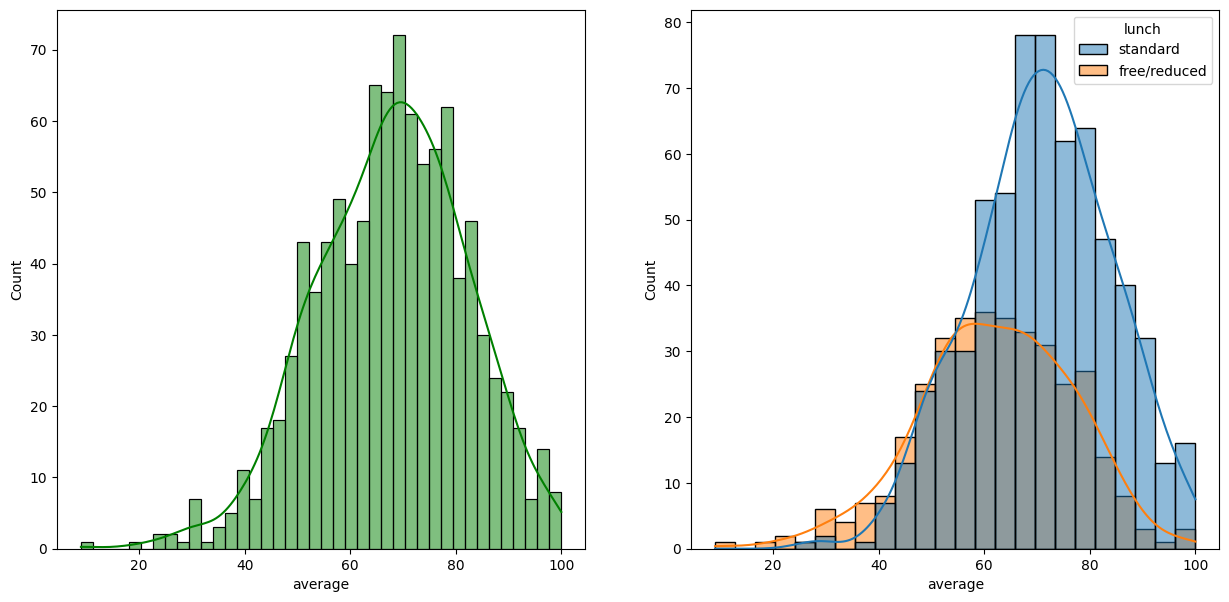

In [46]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=40,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

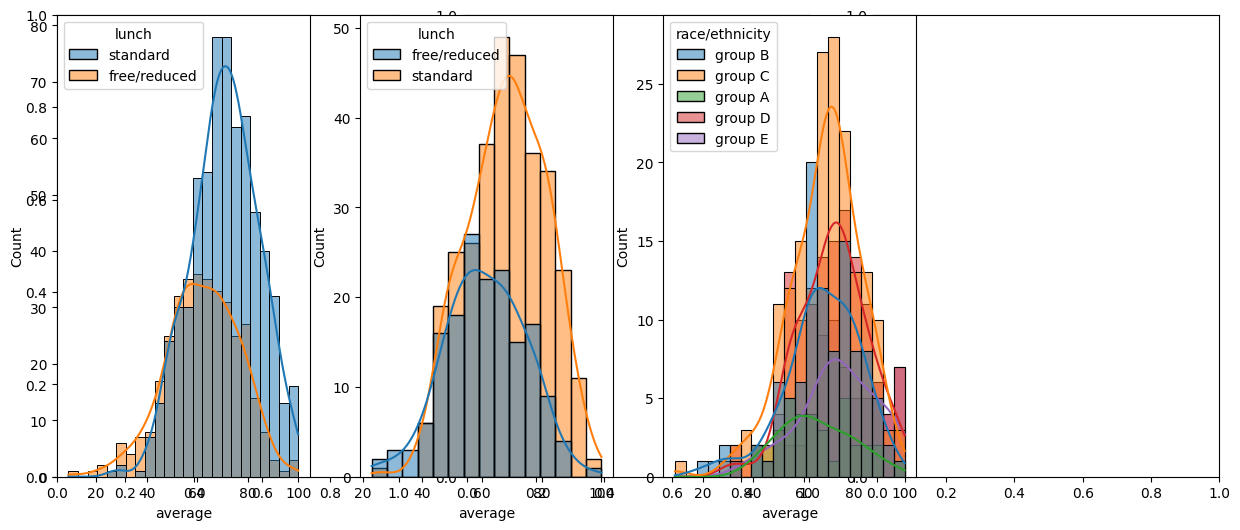

In [53]:
fig,axis=plt.subplots(1,3,figsize=(15,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='race/ethnicity',kde=True)
plt.show()